# **df1 - Model Training**

# **Insurance Risk & Claims Dataset**

In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('/content/df1_scaled.csv')

In [ ]:
df1.head()

Unnamed: 0                             Policy_ID  Customer_Age  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58   
1           1  23b8c1e9-3924-46de-beb1-3b9046685257            65   
2           2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56   
3           3  972a8469-1641-4f82-8b9d-2434e465e150            35   
4           4  17fc695a-07a0-4a6e-8822-e8f36c031199            39   

   Annual_Income  Vehicle_Age_Property_Age  Claim_History  Premium_Amount  \
0       0.741442                         7              1        0.139545   
1       0.590267                         1              0        0.093670   
2       0.715891                        22              4        0.419729   
3       0.697997                        10              2        0.155499   
4       0.379538                        11              2        0.604068   

   Claim_Amount  Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  \
0      0.102080                 0                   0                 0   
1      0.232579                 0                   0                 0   
2      0.449681                 0                   1                 1   
3      0.958985                 1                   1                 1   
4      0.808517                 1                   2                 0   

   Policy_Type_Health  Policy_Type_Life  Policy_Type_Property  Gender_Female  \
0                   1                 0                     0              0   
1                   1                 0                     0              0   
2                   0                 0                     0              0   
3                   0                 0                     0              0   
4                   1                 0                     0              0   

   Gender_Male  Gender_Other  
0            1             0  
1            0             1  
2            1             0  
3            1             0  
4            1             0

In [ ]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df1.head()

Policy_ID  Customer_Age  Annual_Income  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58       0.741442   
1  23b8c1e9-3924-46de-beb1-3b9046685257            65       0.590267   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56       0.715891   
3  972a8469-1641-4f82-8b9d-2434e465e150            35       0.697997   
4  17fc695a-07a0-4a6e-8822-e8f36c031199            39       0.379538   

   Vehicle_Age_Property_Age  Claim_History  Premium_Amount  Claim_Amount  \
0                         7              1        0.139545      0.102080   
1                         1              0        0.093670      0.232579   
2                        22              4        0.419729      0.449681   
3                        10              2        0.155499      0.958985   
4                        11              2        0.604068      0.808517   

   Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  Policy_Type_Health  \
0                 0                   0                 0                   1   
1                 0                   0                 0                   1   
2                 0                   1                 1                   0   
3                 1                   1                 1                   0   
4                 1                   2                 0                   1   

   Policy_Type_Life  Policy_Type_Property  Gender_Female  Gender_Male  \
0                 0                     0              0            1   
1                 0                     0              0            0   
2                 0                     0              0            1   
3                 0                     0              0            1   
4                 0                     0              0            1   

   Gender_Other  
0             0  
1             1  
2             0  
3             0  
4             0

In [ ]:
###############################################################################################################

In [ ]:
df1.nunique()

Policy_ID                   1000
Customer_Age                  63
Annual_Income               1000
Vehicle_Age_Property_Age      31
Claim_History                  6
Premium_Amount              1000
Claim_Amount                 999
Fraudulent_Claim               2
Risk_Score_Encoded             3
Policy_Type_Auto               2
Policy_Type_Health             2
Policy_Type_Life               2
Policy_Type_Property           2
Gender_Female                  2
Gender_Male                    2
Gender_Other                   2
dtype: int64

# **1. Isolation Forest:**

a) An unsupervised machine learning algorithm designed for anomaly detection.

b) Works by isolating observations by randomly selecting features and splitting them.

c) Anomalies get isolated quicker because they differ from normal points.

In [ ]:
!pip install tensorflow

# **1) (known fraud cases):**

**Calculate the actual proportion of anomalies:**





In [ ]:
known_anomalies = df1[df1['Fraudulent_Claim'] == 1]  # Or however fraud is labeled
contamination_rate = len(known_anomalies) / len(df1)
print(f"Contamination rate: {contamination_rate}")

Contamination rate: 0.3


# **Contamination rate: 0.3 - 30%**

# **So i select Contaminated Parameter Value based on Fraudulent_Claim so get Accurate Value**

**"Contamination=0.3"** means that, in a given context, there is a **30% level of unwanted or foreign material present**, indicating a relatively low level of contamination; essentially, **only 30 out of every 100 samples or units** are considered contaminated

**Percentage interpretation:** "0.3" is the same as 30% when expressed as a percentage.

**Contamination is mean as Affected**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Features for anomaly detection
features = [
    'Customer_Age', 'Annual_Income', 'Vehicle_Age_Property_Age', 'Claim_History',
    'Fraudulent_Claim', 'Premium_Amount', 'Claim_Amount', 'Risk_Score_Encoded',
    'Policy_Type_Auto', 'Policy_Type_Health', 'Policy_Type_Life', 'Policy_Type_Property',
    'Gender_Female', 'Gender_Male', 'Gender_Other'
]

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.3, random_state=42) #Find Contamination using by Fraudulent_Claim
df1['Anomaly_IsoForest'] = iso_forest.fit_predict(df1[features])


#Deep Learning


# Build Autoencoder
autoencoder = Sequential([
    Dense(8, activation='relu', input_shape=(len(features),)), #hidden Layer 1,2,3 used -> relu activation functionu used as
    Dense(4, activation='relu'),                               #if losses happen Activation activate backward propagation to work like cycle
    Dense(8, activation='relu'),                               #loss means mse
    Dense(len(features), activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(df1[features], df1[features], epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Get reconstruction errors
reconstructions = autoencoder.predict(df1[features])
mse = np.mean(np.square(reconstructions - df1[features]), axis=1)

# Set anomaly threshold
threshold = np.percentile(mse, 95)  #mean square error above (95 percentile) Threshold consider as a Anomaly

# Tag anomalies from Autoencoder
df1['Anomaly_Autoencoder'] = (mse > threshold).astype(int)

# Output results
print(df1[['Policy_ID', 'Anomaly_IsoForest', 'Anomaly_Autoencoder']])


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 212.3216 - val_loss: 197.5282
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 203.7432 - val_loss: 188.9750
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181.1099 - val_loss: 177.0047
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178.0792 - val_loss: 160.2907
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157.7841 - val_loss: 138.9907
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138.9462 - val_loss: 113.8409
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109.3419 - val_loss: 86.9328
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83.8204 - val_loss: 60.7412
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.1835 - val_loss: 39.0508
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.3122 - val_loss: 23.5459
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.3564 - val_loss: 14.3681
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
df1.head()

Policy_ID  Customer_Age  Annual_Income  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58       0.741442   
1  23b8c1e9-3924-46de-beb1-3b9046685257            65       0.590267   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56       0.715891   
3  972a8469-1641-4f82-8b9d-2434e465e150            35       0.697997   
4  17fc695a-07a0-4a6e-8822-e8f36c031199            39       0.379538   

   Vehicle_Age_Property_Age  Claim_History  Premium_Amount  Claim_Amount  \
0                         7              1        0.139545      0.102080   
1                         1              0        0.093670      0.232579   
2                        22              4        0.419729      0.449681   
3                        10              2        0.155499      0.958985   
4                        11              2        0.604068      0.808517   

   Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  Policy_Type_Health  \
0                 0                   0                 0                   1   
1                 0                   0                 0                   1   
2                 0                   1                 1                   0   
3                 1                   1                 1                   0   
4                 1                   2                 0                   1   

   Policy_Type_Life  Policy_Type_Property  Gender_Female  Gender_Male  \
0                 0                     0              0            1   
1                 0                     0              0            0   
2                 0                     0              0            1   
3                 0                     0              0            1   
4                 0                     0              0            1   

   Gender_Other  Anomaly_IsoForest  Anomaly_Autoencoder  
0             0                  1                    0  
1             1                 -1                    0  
2             0                  1                    0  
3             0                 -1                    0  
4             0                  1                    0

In [ ]:
df1['Anomaly_IsoForest'].value_counts()

Anomaly_IsoForest
 1    700
-1    300
Name: count, dtype: int64

In [ ]:
df1['Anomaly_Autoencoder'].value_counts()

Anomaly_Autoencoder
0    950
1     50
Name: count, dtype: int64

In [ ]:
mse

0       7.759524
1      24.352935
2       2.177744
3       0.214741
4       0.350456
         ...    
995     9.516719
996     6.122230
997     5.480492
998     0.485721
999     2.055374
Length: 1000, dtype: float64

In [ ]:
threshold

25.288161634746352

# **IsolationForest** — for anomaly detection using the Isolation Forest algorithm.

# **Sequential, Dense** — for building and training an Autoencoder (a type of neural network)

# **Isolation Forest**

**contamination=0.49:** This sets the proportion of data we expect to be anomalies.

random_state=42: Ensures reproducibility of results.

**fit_predict():**

**Fits the Isolation Forest model on the features.**
Predicts if each row is an anomaly:

-1 = Anomaly (suspicious data point).
1 = Normal data point.

**Why use Isolation Forest?**

It works well on high-dimensional data.

It’s unsupervised — we don’t need labeled data.

It’s fast and effective for finding outliers.

In [ ]:
##########################################################################################

#**Autoencoder**

**Sequential()** — a simple, stack-based neural network.

**Dense()** — fully connected layers:

8 neurons → 4 neurons → 8 neurons — compressing data into a smaller representation and then reconstructing it.

**relu** — activation function that helps the network learn non-linear patterns.

**Final layer:** Same size as the input (features) because the Autoencoder tries to **reconstruct the original data**.

**adam** — an efficient and widely used optimization algorithm.

**mse (Mean Squared Error)** — measures the reconstruction error. Anomalies will likely have higher errors because they don’t fit the learned pattern

**Training the Autoencoder to learn normal behavior by trying to reconstruct the input.**

validation_split=0.1: Reserves 10% of data for validation.

**i am selecting validation_split=0.1 take 20% of data for testing**

**reconstructions:** The output from the Autoencoder — it tries to replicate the input.

**mse:** Measures how far off the reconstruction is from the actual data row by row.

**Higher MSE** → **More likely to be an anomaly because the model couldn’t "understand" that pattern well**

# **threshold = np.percentile(mse, 95)**

**95th percentile of the MSE values** — the top 5% most "unusual" reconstructions.

**Rows with MSE above this threshold will be labeled as anomalies**.


# **df1['Anomaly_Autoencoder'] = (mse > threshold).astype(int)**

**1 = Anomaly** (reconstruction error above the threshold).

**0 = Normal** data point.

**Policy_ID** — for reference.

**Anomaly_IsoForest** — anomalies detected by Isolation Forest.

**Anomaly_Autoencoder** — anomalies detected by the Autoencoder

# **Why use both methods?**

**Isolation Forest** is fast and rule-based — great for broad anomaly detection.

**Autoencoder** captures complex, non-linear patterns in the data.

Together, they give you a more complete view of potential anomalies.

**How to tune contamination and threshold?**

*If you know the actual percentage of fraud, set contamination to that.

*For Autoencoder, experiment with different percentiles (90%, 95%, 99%) to see what works best.


# **Find Customers Indiviually anomaly**

df1[['Policy_ID', 'Anomaly_IsoForest', 'Anomaly_Autoencoder']]

In [ ]:
df1[['Policy_ID', 'Anomaly_IsoForest', 'Anomaly_Autoencoder']]

Policy_ID  Anomaly_IsoForest  \
0    bdd640fb-0667-4ad1-9c80-317fa3b1799d                  1   
1    23b8c1e9-3924-46de-beb1-3b9046685257                 -1   
2    bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9                  1   
3    972a8469-1641-4f82-8b9d-2434e465e150                 -1   
4    17fc695a-07a0-4a6e-8822-e8f36c031199                  1   
..                                    ...                ...   
995  fe54ee4b-80ff-4173-a3df-ecd70e731dd7                  1   
996  ea98fef8-d0d7-4e37-bbf2-025f4a0d2b73                  1   
997  93d563ae-51a3-4c26-937b-f79bbb44badc                  1   
998  d18183d1-ac2b-4cfc-85c5-1060991121e7                  1   
999  e0527739-4d40-4f1b-bca5-be2952171bf3                  1   

     Anomaly_Autoencoder  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
..                   ...  
995                    0  
996                    0  
997                    0  
998                    0  
999                    0  

[1000 rows x 3 columns]

# **Anomaly_IsoForest**

-1 = Anomaly (suspicious data point).

1 = Normal data point.

# **Anomaly_Autoencoder**

1 = Anomaly (reconstruction error above the threshold).

0 = Normal data point.

In [ ]:
df1['Anomaly_IsoForest'].value_counts()

Anomaly_IsoForest
 1    700
-1    300
Name: count, dtype: int64

In [ ]:
df1['Anomaly_Autoencoder'].value_counts()

Anomaly_Autoencoder
0    950
1     50
Name: count, dtype: int64

In [ ]:
###############################################################################################

# **( i ) Combine them for more robust detection**

In [ ]:
df1['Anomaly_Final'] = ((df1['Anomaly_IsoForest'] == -1) | (df1['Anomaly_Autoencoder'] == 1)).astype(int)

In [ ]:
df1['Anomaly_Final']

0      0
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Anomaly_Final, Length: 1000, dtype: int64

In [ ]:
df1['Anomaly_Final'].value_counts()

Anomaly_Final
0    677
1    323
Name: count, dtype: int64

In [ ]:
df1.head()

Policy_ID  Customer_Age  Annual_Income  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58       0.741442   
1  23b8c1e9-3924-46de-beb1-3b9046685257            65       0.590267   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56       0.715891   
3  972a8469-1641-4f82-8b9d-2434e465e150            35       0.697997   
4  17fc695a-07a0-4a6e-8822-e8f36c031199            39       0.379538   

   Vehicle_Age_Property_Age  Claim_History  Premium_Amount  Claim_Amount  \
0                         7              1        0.139545      0.102080   
1                         1              0        0.093670      0.232579   
2                        22              4        0.419729      0.449681   
3                        10              2        0.155499      0.958985   
4                        11              2        0.604068      0.808517   

   Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  Policy_Type_Health  \
0                 0                   0                 0                   1   
1                 0                   0                 0                   1   
2                 0                   1                 1                   0   
3                 1                   1                 1                   0   
4                 1                   2                 0                   1   

   Policy_Type_Life  Policy_Type_Property  Gender_Female  Gender_Male  \
0                 0                     0              0            1   
1                 0                     0              0            0   
2                 0                     0              0            1   
3                 0                     0              0            1   
4                 0                     0              0            1   

   Gender_Other  Anomaly_IsoForest  Anomaly_Autoencoder  Anomaly_Final  
0             0                  1                    0              0  
1             1                 -1                    0              1  
2             0                  1                    0              0  
3             0                 -1                    0              1  
4             0                  1                    0              0

If your data has simple, obvious outliers → **Isolation Forest.**

If fraud involves complex, hidden patterns → **Autoencoder.**

If you want a balanced, robust approach → **Combine both:**



In [ ]:
############################################################################################

# **Anomaly_Final_High_Risk - take the intersection for high-confidence anomalies**

In [ ]:
df1['Anomaly_Final_High_Risk'] = ((df1['Anomaly_IsoForest'] == -1) & (df1['Anomaly_Autoencoder'] == 1)).astype(int)

In [ ]:
df1['Anomaly_Final_High_Risk'].value_counts()

Anomaly_Final_High_Risk
0    973
1     27
Name: count, dtype: int64

In [ ]:
df1.head(1)

Policy_ID  Customer_Age  Annual_Income  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58       0.741442   

   Vehicle_Age_Property_Age  Claim_History  Premium_Amount  Claim_Amount  \
0                         7              1        0.139545       0.10208   

   Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  Policy_Type_Health  \
0                 0                   0                 0                   1   

   Policy_Type_Life  Policy_Type_Property  Gender_Female  Gender_Male  \
0                 0                     0              0            1   

   Gender_Other  Anomaly_IsoForest  Anomaly_Autoencoder  Anomaly_Final  \
0             0                  1                    0              0   

   Anomaly_Final_High_Risk  
0                        0

In [ ]:
import seaborn as sns

<ipython-input-31-6a3508527684>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Anomaly_IsoForest'])


-0.874183382765495

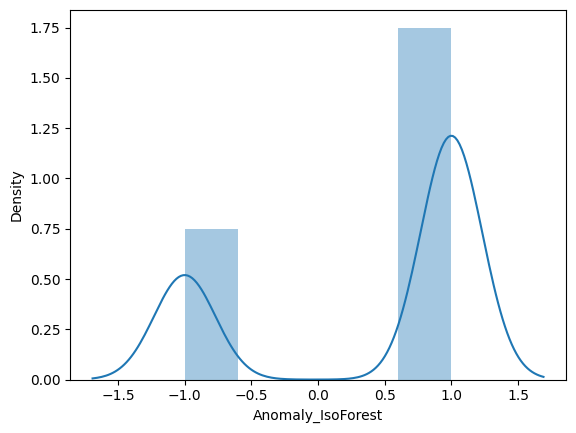

In [ ]:
sns.distplot(df1['Anomaly_IsoForest'])
df1['Anomaly_IsoForest'].skew()

# **Skew : -0.874183382765495 -> Slighly Negative Skewed - Left Tail**

<ipython-input-32-171b064ec458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Anomaly_Autoencoder'])


4.135689330282186

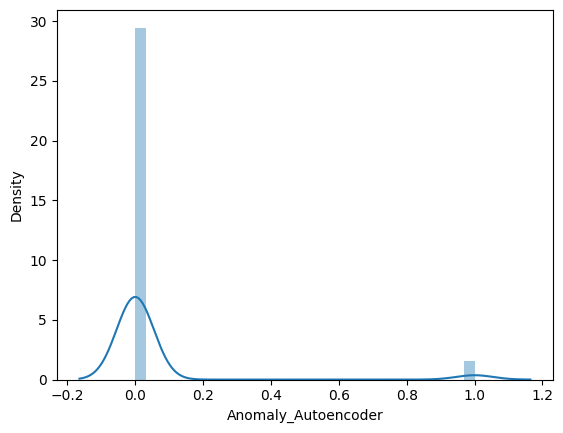

In [ ]:
sns.distplot(df1['Anomaly_Autoencoder'])
df1['Anomaly_Autoencoder'].skew()

# **Skew : 4.135689330282186 Highly Posative Skewed**

# **Isolation Forest** - takes all fraud transaction

# **Autoencoder** - Take most Wanted Fraud Transaction

In [ ]:
###############################################################################################################

# **Isolation Forest:** "Catches most fraud transactions, including obvious and simple fraud. and May be Chances of False Posative  - Easy to all kinds of outliers"

# **Autoencoder:** "Catches the most sophisticated and high-risk fraud transactions (the most wanted)

In [ ]:
###############################################################################################################

In [ ]:
df1.to_csv('df1_fraud-detection.csv')

In [ ]:
###############################################################################################################

# **(i) Feature Engineering**

Select Feature Columns Based on

a) Filter Method

b) Wrapper Method

# **Used Scaled Dataset:**

In [ ]:
df1_scaled = pd.read_csv('/content/df1_scaled.csv')
df1_scaled.head()

Unnamed: 0                             Policy_ID  Customer_Age  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58   
1           1  23b8c1e9-3924-46de-beb1-3b9046685257            65   
2           2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56   
3           3  972a8469-1641-4f82-8b9d-2434e465e150            35   
4           4  17fc695a-07a0-4a6e-8822-e8f36c031199            39   

   Annual_Income  Vehicle_Age_Property_Age  Claim_History  Premium_Amount  \
0       0.741442                         7              1        0.139545   
1       0.590267                         1              0        0.093670   
2       0.715891                        22              4        0.419729   
3       0.697997                        10              2        0.155499   
4       0.379538                        11              2        0.604068   

   Claim_Amount  Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  \
0      0.102080                 0                   0                 0   
1      0.232579                 0                   0                 0   
2      0.449681                 0                   1                 1   
3      0.958985                 1                   1                 1   
4      0.808517                 1                   2                 0   

   Policy_Type_Health  Policy_Type_Life  Policy_Type_Property  Gender_Female  \
0                   1                 0                     0              0   
1                   1                 0                     0              0   
2                   0                 0                     0              0   
3                   0                 0                     0              0   
4                   1                 0                     0              0   

   Gender_Male  Gender_Other  
0            1             0  
1            0             1  
2            1             0  
3            1             0  
4            1             0

# **It is used to train models for risk classification, claim prediction, and fraud detection.**

In [ ]:
df1_scaled.columns.values

array(['Unnamed: 0', 'Policy_ID', 'Customer_Age', 'Annual_Income',
       'Vehicle_Age_Property_Age', 'Claim_History', 'Premium_Amount',
       'Claim_Amount', 'Fraudulent_Claim', 'Risk_Score_Encoded',
       'Policy_Type_Auto', 'Policy_Type_Health', 'Policy_Type_Life',
       'Policy_Type_Property', 'Gender_Female', 'Gender_Male',
       'Gender_Other'], dtype=object)

# **1st Prediction about Risk classification, / Risk_Score_Encoded Column**

**Risk_Score_Encoded as Target Columns**

In [ ]:
feature = df1_scaled.copy()

feature = feature.drop(columns=['Unnamed: 0','Policy_ID','Risk_Score_Encoded',])

In [ ]:
target = df1_scaled['Risk_Score_Encoded']

In [ ]:
feature.head()

Customer_Age  Annual_Income  Vehicle_Age_Property_Age  Claim_History  \
0            58       0.741442                         7              1   
1            65       0.590267                         1              0   
2            56       0.715891                        22              4   
3            35       0.697997                        10              2   
4            39       0.379538                        11              2   

   Premium_Amount  Claim_Amount  Fraudulent_Claim  Policy_Type_Auto  \
0        0.139545      0.102080                 0                 0   
1        0.093670      0.232579                 0                 0   
2        0.419729      0.449681                 0                 1   
3        0.155499      0.958985                 1                 1   
4        0.604068      0.808517                 1                 0   

   Policy_Type_Health  Policy_Type_Life  Policy_Type_Property  Gender_Female  \
0                   1                 0                     0              0   
1                   1                 0                     0              0   
2                   0                 0                     0              0   
3                   0                 0                     0              0   
4                   1                 0                     0              0   

   Gender_Male  Gender_Other  
0            1             0  
1            0             1  
2            1             0  
3            1             0  
4            1             0

In [ ]:
target.head()

0    0
1    0
2    1
3    1
4    2
Name: Risk_Score_Encoded, dtype: int64

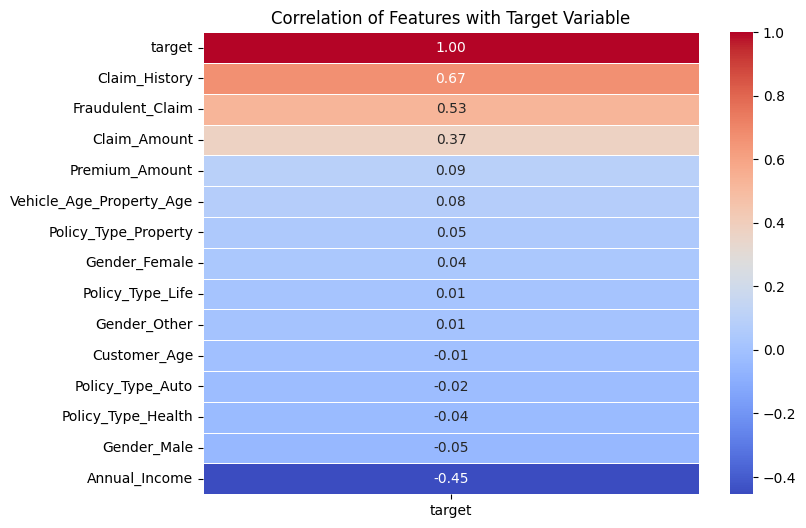

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target into one DataFrame
df = feature.copy()
df['target'] = target  # Add target column to the DataFrame

# Calculate correlation matrix
correlation_matrix = df.corr()

# Isolate target correlations
target_corr = correlation_matrix[['target']].sort_values(by='target', ascending=False)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and show
plt.title('Correlation of Features with Target Variable')
plt.show()


# **target ( Risk_Score_Encoded ) - Highly Contributed Feature Columns near to 0 is No Contributed**

In [ ]:
############################################################################

# **1) Model Training**

In [ ]:
x = feature
y = target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
target.value_counts()

Risk_Score_Encoded
2    340
0    330
1    330
Name: count, dtype: int64

# **target is multiclass**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 3. Initialize the model (Random Forest Classifier)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# **For Test prediction**

In [ ]:
y_pred_test = rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy Score: 0.825

Confusion Matrix:
 [[56 13  0]
 [ 2 49  9]
 [ 0 11 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88        69
           1       0.67      0.82      0.74        60
           2       0.87      0.85      0.86        71

    accuracy                           0.82       200
   macro avg       0.84      0.82      0.83       200
weighted avg       0.84      0.82      0.83       200



# **For Train Prediction**

In [ ]:
y_pred_train = rf_model.predict(x_train)

In [ ]:
print("Accuracy Score:", accuracy_score(y_train, y_pred_train))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

Accuracy Score: 1.0

Confusion Matrix:
 [[261   0   0]
 [  0 270   0]
 [  0   0 269]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       269

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [ ]:
# 7. (Optional) Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
print("\nFeature Importances:\n", feature_importances.sort_values(ascending=False))



Feature Importances:
 Annual_Income               0.233580
Claim_History               0.225815
Claim_Amount                0.148753
Fraudulent_Claim            0.087263
Premium_Amount              0.079539
Customer_Age                0.074902
Vehicle_Age_Property_Age    0.071109
Gender_Male                 0.013563
Policy_Type_Life            0.011798
Policy_Type_Property        0.011502
Policy_Type_Auto            0.011098
Gender_Female               0.010701
Gender_Other                0.010196
Policy_Type_Health          0.010182
dtype: float64


In [ ]:
##########################################################################################

# **Random Forest Classifier Using to Train Model** Compaines all codes

Test Set Accuracy Score: 0.82

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        66
           1       0.73      0.71      0.72        66
           2       0.86      0.84      0.85        68

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



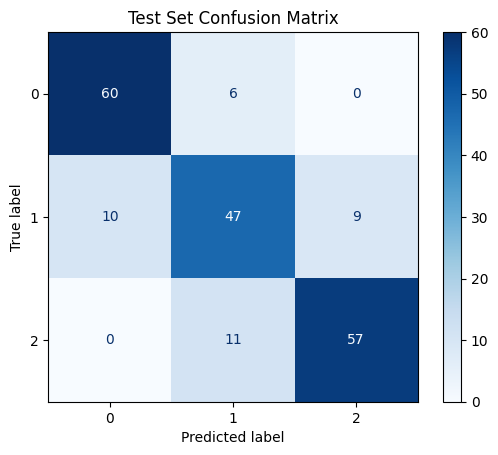


Class: 0
True Positive: 60
False Positive: 10
False Negative: 6
True Negative: 124

Class: 1
True Positive: 47
False Positive: 17
False Negative: 19
True Negative: 117

Class: 2
True Positive: 57
False Positive: 9
False Negative: 11
True Negative: 123
Class 0: High false positive rate – consider tuning the model to improve precision.
Class 1: High false negative rate – consider tuning the model to improve recall.
Class 2: High false negative rate – consider tuning the model to improve recall.
Train Set Accuracy Score: 1.0

Train Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00       264
           2       1.00      1.00      1.00       272

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



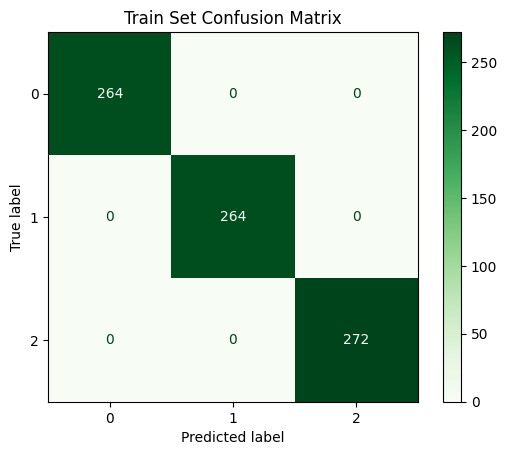

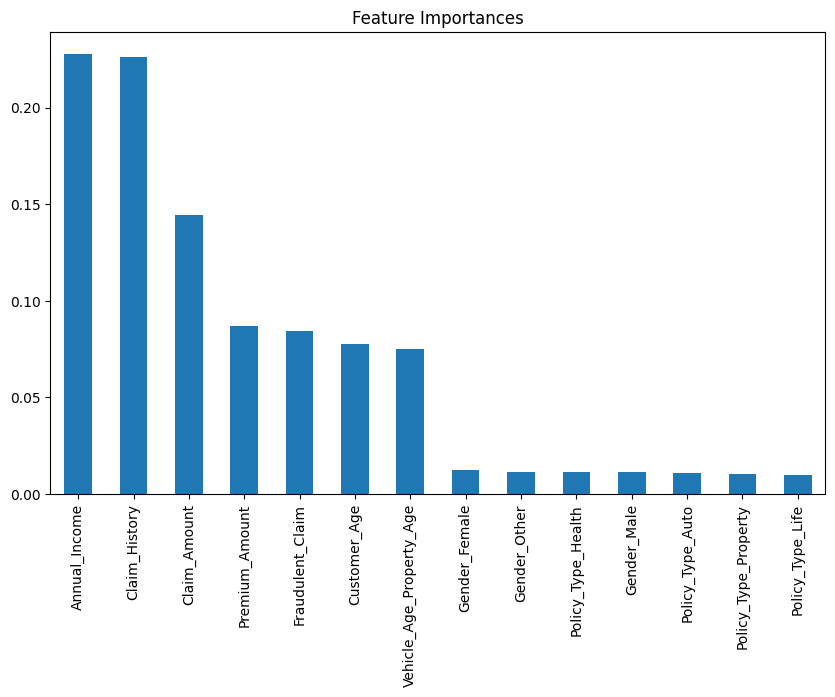

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Features and target
x = feature  # Assuming feature is a preprocessed DataFrame
y = target   # Assuming target is the target variable

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Predictions on the test set
y_pred_test = rf_model.predict(x_test)

# Test set evaluation
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))

# Visualize confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.show()

# Extract per-class true positive, false positive, false negative, true negative
FP = cm_test.sum(axis=0) - np.diag(cm_test)  # False positives per class
FN = cm_test.sum(axis=1) - np.diag(cm_test)  # False negatives per class
TP = np.diag(cm_test)                       # True positives per class
TN = cm_test.sum() - (FP + FN + TP)         # True negatives per class

# Print the results
for i, class_label in enumerate(rf_model.classes_):
    print(f"\nClass: {class_label}")
    print(f"True Positive: {TP[i]}")
    print(f"False Positive: {FP[i]}")
    print(f"False Negative: {FN[i]}")
    print(f"True Negative: {TN[i]}")

# Suggestions based on confusion matrix
for i, class_label in enumerate(rf_model.classes_):
    if FP[i] > FN[i]:
        print(f"Class {class_label}: High false positive rate – consider tuning the model to improve precision.")
    elif FN[i] > FP[i]:
        print(f"Class {class_label}: High false negative rate – consider tuning the model to improve recall.")
    else:
        print(f"Class {class_label}: Balanced error rates – model performance is fairly even.")

# Predictions on the train set
y_pred_train = rf_model.predict(x_train)

# Train set evaluation
print("Train Set Accuracy Score:", accuracy_score(y_train, y_pred_train))
print("\nTrain Set Classification Report:\n", classification_report(y_train, y_pred_train))

# Visualize confusion matrix for train set
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rf_model.classes_)
disp.plot(cmap='Greens')
plt.title('Train Set Confusion Matrix')
plt.show()

# Feature importance visualization
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()


# **Check Accuracy Status Overfit or Underfit**

In [ ]:
# Determine if the model is overfitting, underfitting, or generalizing well
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Set Accuracy Score:", test_accuracy)
print("Train Set Accuracy Score:", train_accuracy)

if train_accuracy > test_accuracy + 0.1:
    print("Model is overfitting – it performs well on training data but poorly on test data.")
elif test_accuracy > train_accuracy + 0.1:
    print("Model is underfitting – it struggles to perform well even on training data.")
else:
    print("Model is generalizing well – performance is balanced between training and test sets.")


Test Set Accuracy Score: 0.82
Train Set Accuracy Score: 1.0
Model is overfitting – it performs well on training data but poorly on test data.


# **Train Data highly Memorized the dataset that's why**

# **Check Dataset Balanced or Unbalanced**

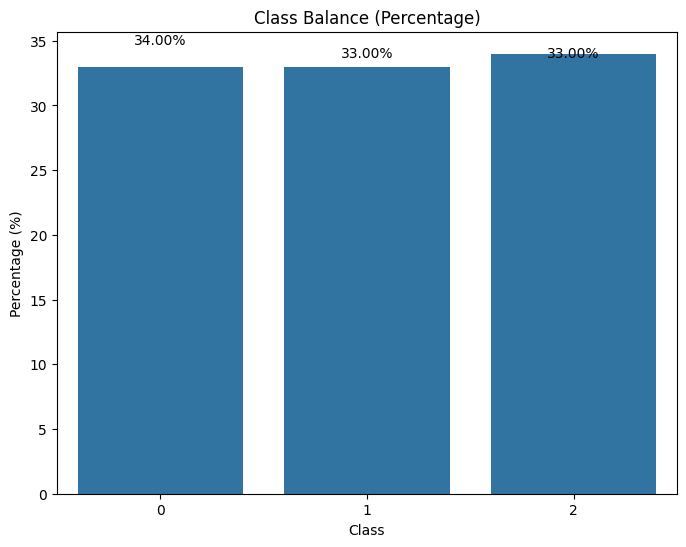

Class distribution (absolute):
 Risk_Score_Encoded
2    340
0    330
1    330
Name: count, dtype: int64
Class distribution (percentage):
 Risk_Score_Encoded
2    34.0
0    33.0
1    33.0
Name: count, dtype: float64
The dataset is fairly balanced.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check balance of target classes
target_counts = y.value_counts()
total = len(y)

# Calculate percentages
target_percentages = (target_counts / total) * 100

# Create a barplot with percentages
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_percentages)
plt.title('Class Balance (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')

# Add percentage labels on the bars
for i, percentage in enumerate(target_percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

print("Class distribution (absolute):\n", target_counts)
print("Class distribution (percentage):\n", target_percentages)

# Determine if the data is balanced or imbalanced
threshold = 0.1  # Define an acceptable imbalance ratio
max_count = target_counts.max()
min_count = target_counts.min()
imbalance_ratio = (max_count - min_count) / max_count

if imbalance_ratio > threshold:
    print("The dataset is imbalanced.")
else:
    print("The dataset is fairly balanced.")


# **The dataset is balanced**

# **2) No Smote Method is Needed Dataset Already Balanced**

In [ ]:
############################################################################################

# **3) now use cross validation**

# **Cross Validation using Balanced Dataset**

**x_resampled, y_resampled**

# **Using Folds 2**

Cross-validation scores: [0.828 0.844]
Mean cross-validation accuracy: 0.8360
Test Set Accuracy Score: 0.82

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        66
           1       0.73      0.71      0.72        66
           2       0.86      0.84      0.85        68

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



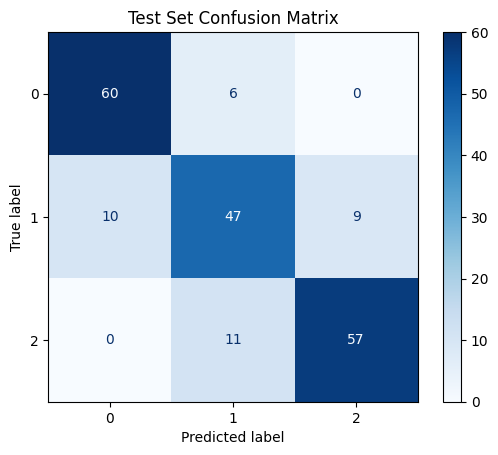


Class: 0
True Positive: 60
False Positive: 10
False Negative: 6
True Negative: 124

Class: 1
True Positive: 47
False Positive: 17
False Negative: 19
True Negative: 117

Class: 2
True Positive: 57
False Positive: 9
False Negative: 11
True Negative: 123
Class 0: High false positive rate – consider tuning the model to improve precision.
Class 1: High false negative rate – consider tuning the model to improve recall.
Class 2: High false negative rate – consider tuning the model to improve recall.
Train Set Accuracy Score: 1.0

Train Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00       264
           2       1.00      1.00      1.00       272

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



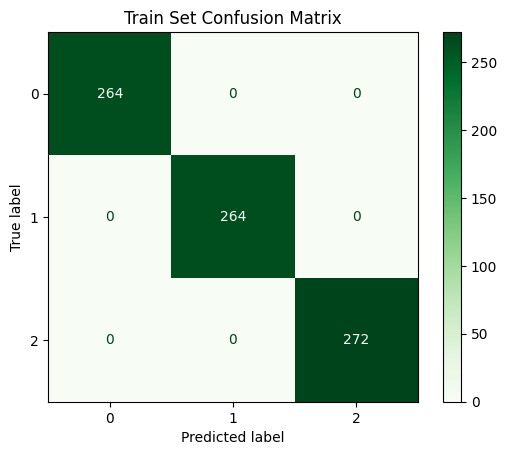

In [ ]:

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay




# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.4f}")

# Train the model
rf_model.fit(x_train, y_train)

# Predictions on the test set
y_pred_test = rf_model.predict(x_test)

# Test set evaluation
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))

# Visualize confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.show()

# Extract per-class true positive, false positive, false negative, true negative
FP = cm_test.sum(axis=0) - np.diag(cm_test)  # False positives per class
FN = cm_test.sum(axis=1) - np.diag(cm_test)  # False negatives per class
TP = np.diag(cm_test)                       # True positives per class
TN = cm_test.sum() - (FP + FN + TP)         # True negatives per class

# Print the results
for i, class_label in enumerate(rf_model.classes_):
    print(f"\nClass: {class_label}")
    print(f"True Positive: {TP[i]}")
    print(f"False Positive: {FP[i]}")
    print(f"False Negative: {FN[i]}")
    print(f"True Negative: {TN[i]}")

# Suggestions based on confusion matrix
for i, class_label in enumerate(rf_model.classes_):
    if FP[i] > FN[i]:
        print(f"Class {class_label}: High false positive rate – consider tuning the model to improve precision.")
    elif FN[i] > FP[i]:
        print(f"Class {class_label}: High false negative rate – consider tuning the model to improve recall.")
    else:
        print(f"Class {class_label}: Balanced error rates – model performance is fairly even.")

# Predictions on the train set
y_pred_train = rf_model.predict(x_train)

# Train set evaluation
print("Train Set Accuracy Score:", accuracy_score(y_train, y_pred_train))
print("\nTrain Set Classification Report:\n", classification_report(y_train, y_pred_train))

# Visualize confusion matrix for train set
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rf_model.classes_)
disp.plot(cmap='Greens')
plt.title('Train Set Confusion Matrix')
plt.show()


In [ ]:
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("Train Set Accuracy Score:", accuracy_score(y_train, y_pred_train))

Test Set Accuracy Score: 0.82
Train Set Accuracy Score: 1.0


In [ ]:
# Determine if the model is overfitting, underfitting, or generalizing well
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Set Accuracy Score:", test_accuracy)
print("Train Set Accuracy Score:", train_accuracy)

if train_accuracy > test_accuracy + 0.1:
    print("Model is overfitting – it performs well on training data but poorly on test data.")
elif test_accuracy > train_accuracy + 0.1:
    print("Model is underfitting – it struggles to perform well even on training data.")
else:
    print("Model is generalizing well – performance is balanced between training and test sets.")


Test Set Accuracy Score: 0.82
Train Set Accuracy Score: 1.0
Model is overfitting – it performs well on training data but poorly on test data.


In [ ]:
#############################################################################################

# **4) Hyper Parameter tuning**

# **Hyper Parameter Tunning user For Grid search CV using Random Forest Algorithm**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Grid Search CV without Stratified K-Fold
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid_params, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the resampled data (assuming x_resampled and y_resampled are your balanced dataset)
grid_search.fit(x, y)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_:.4f}")

# Train the best model on the full training set
best_rf_model = grid_search.best_estimator_

# Predictions on the test set
y_pred_test = best_rf_model.predict(x_test)

# Test set evaluation
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.8520
Test Set Accuracy Score: 0.99

Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.97      1.00      0.99        66
           2       1.00      0.99      0.99        68

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



# **Using Best Parameters while get Hyperparameter Tunning**

Test Set Accuracy Score: 0.83

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        66
           1       0.75      0.73      0.74        66
           2       0.87      0.87      0.87        68

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



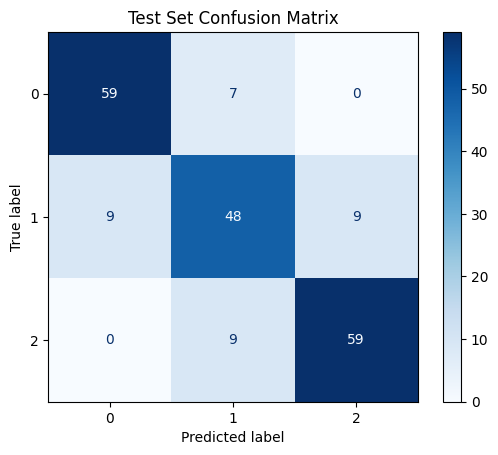

Train Set Accuracy Score: 0.995

Train Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       264
           1       0.99      1.00      0.99       264
           2       1.00      1.00      1.00       272

    accuracy                           0.99       800
   macro avg       1.00      0.99      0.99       800
weighted avg       1.00      0.99      1.00       800



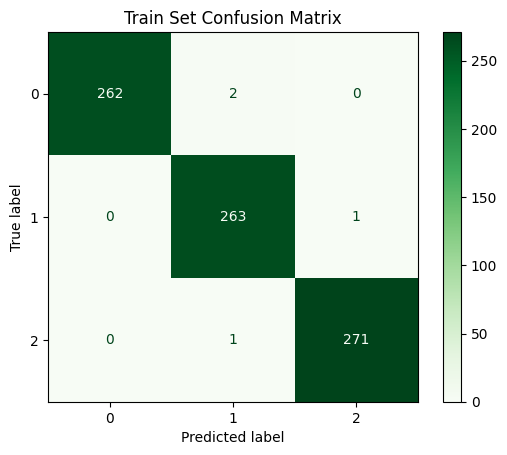

Train Accuracy: 99.50%
Test Accuracy: 83.00%
The model may be overfitting.


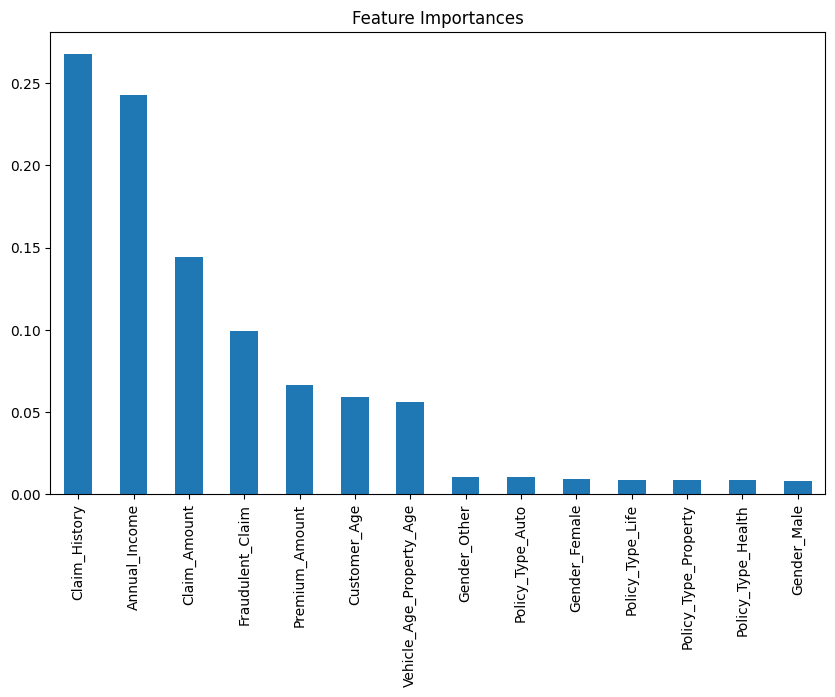

In [ ]:
#Split the  data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, criterion='entropy', random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Predictions on the test set
y_pred_test = rf_model.predict(x_test)

# Test set evaluation
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred_test))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))

# Visualize confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.show()

# Predictions on the train set
y_pred_train = rf_model.predict(x_train)

# Train set evaluation
print("Train Set Accuracy Score:", accuracy_score(y_train, y_pred_train))
print("\nTrain Set Classification Report:\n", classification_report(y_train, y_pred_train))

# Visualize confusion matrix for train set
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rf_model.classes_)
disp.plot(cmap='Greens')
plt.title('Train Set Confusion Matrix')
plt.show()

# Compare train and test accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.1:
    print("The model may be overfitting.")
elif test_accuracy > train_accuracy + 0.1:
    print("The model may be underfitting.")
else:
    print("The model generalizes well.")

# Feature importance visualization
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()


In [ ]:
# Determine if the model is overfitting, underfitting, or generalizing well
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Set Accuracy Score:", test_accuracy)
print("Train Set Accuracy Score:", train_accuracy)

if train_accuracy > test_accuracy + 0.1:
    print("Model is overfitting – it performs well on training data but poorly on test data.")
elif test_accuracy > train_accuracy + 0.1:
    print("Model is underfitting – it struggles to perform well even on training data.")
else:
    print("Model is generalizing well – performance is balanced between training and test sets.")


Test Set Accuracy Score: 0.83
Train Set Accuracy Score: 0.995
Model is overfitting – it performs well on training data but poorly on test data.


# **After Hyperparamter Tuning showing Test Accuracy is 83%**

In [ ]:
########################################################################################

# **5) Deep Learning Neural Network**

In [ ]:
!pip install tensorflow

In [ ]:
target.head()

0    0
1    0
2    1
3    1
4    2
Name: Risk_Score_Encoded, dtype: int64

In [ ]:
feature.head(1)

Customer_Age  Annual_Income  Vehicle_Age_Property_Age  Claim_History  \
0            58       0.741442                         7              1   

   Premium_Amount  Claim_Amount  Fraudulent_Claim  Policy_Type_Auto  \
0        0.139545       0.10208                 0                 0   

   Policy_Type_Health  Policy_Type_Life  Policy_Type_Property  Gender_Female  \
0                   1                 0                     0              0   

   Gender_Male  Gender_Other  
0            1             0

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Example: Assuming X (features) and y (target) are already defined
X = feature
y = target

# One-hot encode target for multiclass classification
y = to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on train data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}")

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict and get classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3329 - loss: 3.4432 - val_accuracy: 0.3500 - val_loss: 1.2891
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3209 - loss: 1.9863 - val_accuracy: 0.3450 - val_loss: 1.1580
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3452 - loss: 1.4708 - val_accuracy: 0.3500 - val_loss: 1.0956
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3733 - loss: 1.1979 - val_accuracy: 0.3750 - val_loss: 1.0801
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3596 - loss: 1.1510 - val_accuracy: 0.4650 - val_loss: 1.0877
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3287 - loss: 1.1311 - val_accuracy: 0.4850 - val_loss: 1.0883
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4002 - loss: 1.1176 - val_accuracy: 0.5750 - val_loss: 1.0816
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4225 - loss: 1.0886 - val_accuracy: 0.5100 - val_loss: 1.0663
Epo

Test Accuracy: 0.8150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.98      0.78      0.87        69
           1       0.71      0.65      0.68        60
           2       0.78      0.99      0.87        71

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.83      0.81      0.81       200



In [ ]:
# Evaluate the model on train data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}")

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


print("Test Set Accuracy Score:", test_acc)
print("Train Set Accuracy Score:", train_acc)

if train_acc > test_acc + 0.1:
    print("Model is overfitting – it performs well on training data but poorly on test data.")
elif test_acc > train_acc + 0.1:
    print("Model is underfitting – it struggles to perform well even on training data.")
else:
    print("Model is generalizing well – performance is balanced between training and test sets.")


Train Accuracy: 0.8087
Test Accuracy: 0.8150
Test Set Accuracy Score: 0.8149999976158142
Train Set Accuracy Score: 0.8087499737739563
Model is generalizing well – performance is balanced between training and test sets.


# **Model is generalizing well** - After deep learning

1) Increase or decrease the number of neurons or layers.

2) Tune the dropout rate to prevent overfitting.

3) Experiment with different activation functions like LeakyReLU or ELU.

4) Adjust learning rate in the Adam optimizer.

5) Try adding BatchNormalization layers.

# **Now Save the Deep Learning Model in .h5 #hdf5 Format**

In [ ]:
model.save('my_model.h5')  # Or 'my_model' for SavedModel format

In [ ]:
import joblib

# Save the model in .pkl format
joblib.dump(model, 'my_model.pkl')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
